# 📊 Simple Linear Regression on Placement Data

This notebook applies **Simple Linear Regression** to a dataset named `placement.csv`, which contains information about students' **CGPA** and their **placement package**. The goal is to predict placement packages based on academic performance.

---
### 🧠 Objective

To understand how a student's CGPA correlates with their placement salary using a linear trend line.

---

### 📈 Dataset Features

- `cgpa`: Student's CGPA
- `package`: Salary package offered (in LPA or units)

---
### ✅ Steps Covered:

1. **Data Import & Preprocessing**
2. **Feature and Label Selection**
3. **Train/Test Split**
4. **Model Training using Linear Regression**
5. **Prediction on New Input**
6. **Model Evaluation (MAE, MSE, RMSE, R² Score)**
7. **Visualization of the Regression Line**

---




In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

1. **Data Import & Preprocessing**

In [ ]:
# Load dataset
df = pd.read_csv("/content/placement.csv")  # Ensure this file has the required columns
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


2. **Feature and Label Selection**

In [ ]:
# Select features (X) and target variable (y)
X = df[["cgpa"]]
y = df["package"]  # Target variable


3. **Train/Test Split**

In [ ]:
# Split into training (80%) and testing (20%) datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,cgpa
137,7.14
163,8.93
111,5.42
123,5.10
109,7.77
...,...
43,7.66
22,6.14
72,7.78
15,7.25


In [ ]:
y_train

,package
137,3.13
163,3.91
111,2.25
123,2.30
109,4.06
...,...
43,2.76
22,2.30
72,3.62
15,3.23


4. **Model Training using Linear Regression**

In [ ]:
# Train a Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on Test Data
y_pred = model.predict(X_test)
y_pred

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

5. **Prediction on New Input**

In [ ]:
# Make Prediction
New_Data = float(input("Enter CGPA: "))
New_Data = np.array([[New_Data]])  # Reshape to 2D array
Prediction_Result = model.predict(New_Data)
print(f"Result of Prediction: {Prediction_Result[0]:.2f}")

Enter CGPA: 7.5
Result of Prediction: 3.29


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# equation of line is y=mx+b(y=prediction, m=slope/coefficient, x=input, b=intercept)
m=model.coef_
print(f"Slope of eualtion : {m[0]:.2f}")
b=model.intercept_
print(f"Intercept of eualtion : {b}")

Slope of eualtion : 0.56
Intercept of eualtion : -0.8961119222429144


In [ ]:
# Manual prediction using slope and intercept in new data
#y=mx+b
print(f"New Data : {New_Data[0][0]}")
Prediction_Result2=0.57*New_Data+-1.0270069374542108

print(f"Prediction result:{Prediction_Result2[0][0]}")

New Data : 7.5
Prediction result:3.2479930625457887


6. **Model Evaluation (MAE, MSE, RMSE, R² Score)**

In [ ]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:\nMean Absolute Error: {mae}\nMean Squared Error: {mse}\nR² Score: {r2}")

Model Performance:
Mean Absolute Error: 0.2884710931878175
Mean Squared Error: 0.12129235313495527
R² Score: 0.780730147510384


7. **Visualization of the Regression Line**

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


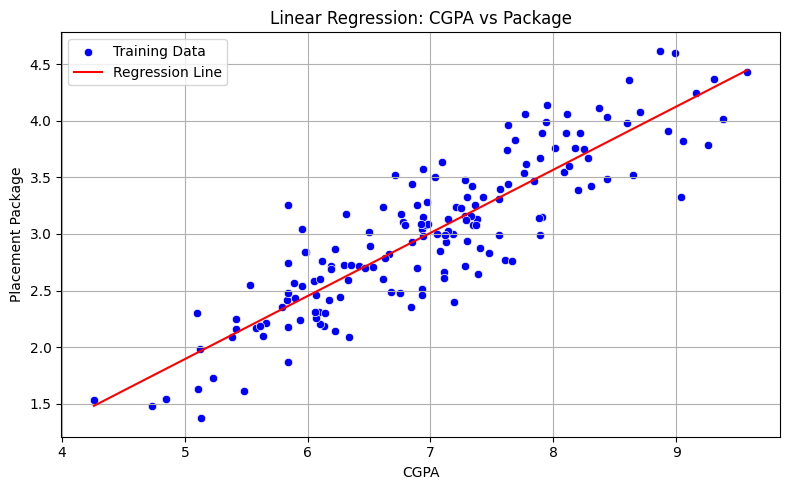

In [ ]:
# Visulaising the Linear Regression Line
plt.figure(figsize=(8, 5))

# Scatter actual training data
sns.scatterplot(x=X_train['cgpa'], y=y_train, color='blue', label='Training Data')

# Plot regression line over the full range of cgpa
x_range = np.linspace(X['cgpa'].min(), X['cgpa'].max(), 100)
y_range = model.predict(x_range.reshape(-1, 1))

# Plot the regression line
plt.plot(x_range, y_range, color='red', label='Regression Line')

plt.title("Linear Regression: CGPA vs Package")
plt.xlabel("CGPA")
plt.ylabel("Placement Package")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 📈 Output Example

- Blue points: Actual training data
- Red line: Predicted linear trend
- A smooth prediction curve based on the fitted model


## ✅ Conclusion

- The notebook shows a clear positive correlation between CGPA and package.
- A linear regression model can provide simple and interpretable predictions for placement outcomes.

---

_This notebook is part of a learning series to practice core machine learning concepts using real datasets._